In [1]:
from imports import *
from hyperparameters import Hyperparameters
from trial_function import TrialFunction

In [3]:
hyperparam = Hyperparameters("../hyperparameters/hyperparameters.csv")

In [4]:
hyperparam.activationFunction = 'tanh'

In [5]:
hyperparam.batchSize = 100
hyperparam.numberOfStates = 1

In [6]:
trialFunc = TrialFunction(
    hyperparam,
    "test"
)

In [7]:
# x = torch.rand(
#     (
#         hyperparam.batchSize,
#         hyperparam.coordinateSpaceDim
#     ),
#     device=hyperparam.device
# )

x  = torch.linspace(-1,1,hyperparam.batchSize,device=hyperparam.device).reshape(
    (
        hyperparam.batchSize,
        hyperparam.coordinateSpaceDim
    )
)

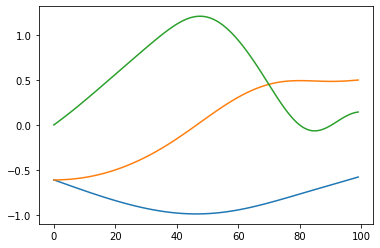

In [8]:
plt.plot(trialFunc(x).cpu().detach().numpy().reshape(-1))
plt.plot(trialFunc.gradient(x).cpu().detach().numpy().reshape(-1))
plt.plot(trialFunc.laplacian(x).cpu().detach().numpy().reshape(-1))

In [9]:
torch.save(trialFunc.state_dict(), trialFunc.PATH)

In [10]:
model = TrialFuncion(hyperparam, "test1")
model.load_state_dict(torch.load(trialFunc.PATH))
model.eval()

TrialFuncion(
  (neuralNetwork): NeuralNetwork(
    (activationFunction): CustomTanh()
    (stack): Sequential(
      (0): Linear(in_features=1, out_features=100, bias=True)
      (1): CustomTanh()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): CustomTanh()
      (4): Linear(in_features=100, out_features=100, bias=True)
      (5): CustomTanh()
      (6): Linear(in_features=100, out_features=1, bias=True)
      (7): CustomTanh()
    )
  )
  (amplitudeFunction): Gaussian()
)

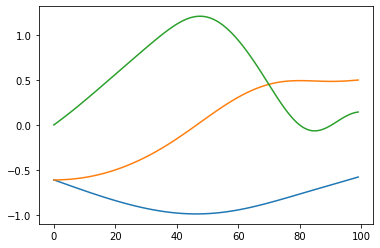

In [11]:
plt.plot(model(x).cpu().detach().numpy().reshape(-1))
plt.plot(model.gradient(x).cpu().detach().numpy().reshape(-1))
plt.plot(model.laplacian(x).cpu().detach().numpy().reshape(-1))